Iris Classification Chapter 6 Workshop 6

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the iris dataset
df = sns.load_dataset('iris')
df.sample(5,random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


Check Null

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Visualization

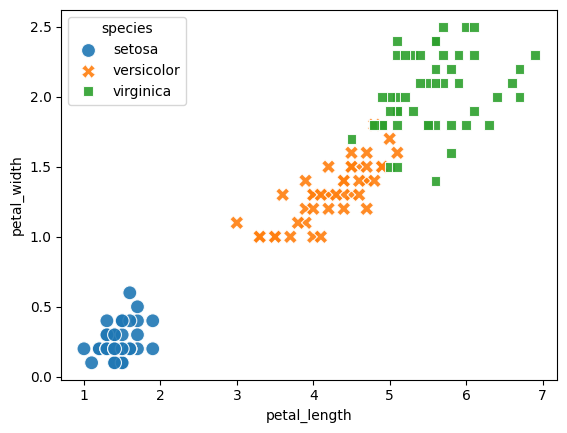

In [5]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, style='species',
                alpha=0.9, edgecolor='w' , s=100)
plt.show()

Prepare data

In [6]:
# # Prepare y with pandas
# y, class_names = pd.factorize(df.species, sort=True)
# # print(pd.unique(y))
# print(y[45:100])
# print(class_names)

In [7]:
# encode label class with numpy
class_names, y = np.unique(df.species, return_inverse=True)
print(class_names)
print(y[45:100])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Prepare X

In [8]:
X = df.drop(columns=['species'], axis=1)
X.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


Standard Scale

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
print(X_sc[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc,
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=1)
print(X_train.shape, X_test.shape)
print(X_train[:5])

(112, 4) (38, 4)
[[ 0.79566902 -0.59237301  0.47857113  0.3957741 ]
 [ 1.03800476 -1.28296331  1.16062026  0.79067065]
 [ 1.15917263 -0.13197948  0.99010798  1.18556721]
 [-0.90068117  1.01900435 -1.34022653 -1.18381211]
 [ 0.18982966 -1.97355361  0.70592084  0.3957741 ]]


In [11]:
y_train.shape, y_test.shape
print(y_train[:5])

[1 2 2 0 2]


Encode with One-hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical
import numpy as np

def one_hot_encode(arr):
    # encode from categorical to integer
    categories, ids = np.unique(arr, return_inverse=True)  # Get unique categories
    # Encode to one-hot format (binary)
    return to_categorical(ids, len(categories))  # Pass the original array

# Apply one-hot encoding
y_train_1h = one_hot_encode(y_train).astype('int')
y_test_1h = one_hot_encode(y_test).astype('int')

# Display the first 5 rows of the one-hot encoded test labels
y_test_1h[:5]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [13]:
# # Use pandas
# y_train_1h = pd.get_dummies(y_train)
# y_test_1h = pd.get_dummies(y_test)

# y_test_1h.head()

Create Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Add Layer be 64 nodes with ReLU activation
# input_shape is getting 4 features
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Add output layer with 3 nodes (one for each class) and softmax activation
model.add(Dense(y_train_1h.shape[1], activation='softmax'))

d:\Programming_File\Environment\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Check model structure

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.output_shape

(None, 3)

Compile model

In [17]:
# there are 3 classes so use categorical_crossentropy
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Train and Evaluate

In [18]:
history = model.fit(X_train,
                    y_train_1h,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.25,
                    verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5456 - loss: 0.9835 - val_accuracy: 0.5357 - val_loss: 0.9272
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6704 - loss: 0.8599 - val_accuracy: 0.6786 - val_loss: 0.8502
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7944 - loss: 0.7243 - val_accuracy: 0.6786 - val_loss: 0.7849
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7912 - loss: 0.6469 - val_accuracy: 0.6786 - val_loss: 0.7275
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8260 - loss: 0.5703 - val_accuracy: 0.6786 - val_loss: 0.6811
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8640 - loss: 0.4868 - val_accuracy: 0.6786 - val_loss: 0.6449
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8171 - loss: 0.5272 - val_accuracy: 0.6786 - val_loss: 0.6068
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8694 - loss: 0.4204 - val_accuracy: 0.6786 - 

In [19]:
score = model.evaluate(X_test, y_test_1h, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07197076082229614
Test accuracy: 0.9736841917037964


In [20]:
model.metrics_names

['loss', 'compile_metrics']

Test Predict

In [21]:
y_pred = model.predict(X_test)
y_pred[:5].round(3)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.999, 0.001, 0.   ],
       [0.069, 0.922, 0.009],
       [0.003, 0.965, 0.033],
       [0.999, 0.001, 0.   ],
       [0.   , 0.145, 0.855]], dtype=float32)

In [22]:
y_pred_cat = np.argmax(y_pred, axis=1)
print(y_pred_cat[:5])

[0 1 1 0 2]


Check Metric Prediction

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test, y_pred_cat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Loss Curve

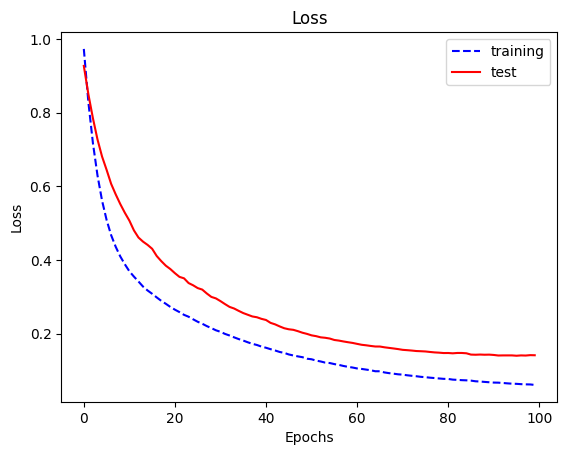

In [24]:
df_hist = pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(label='training', style='b--')
df_hist['val_loss'].plot(label='test', style='r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

Model Accuracy Curve

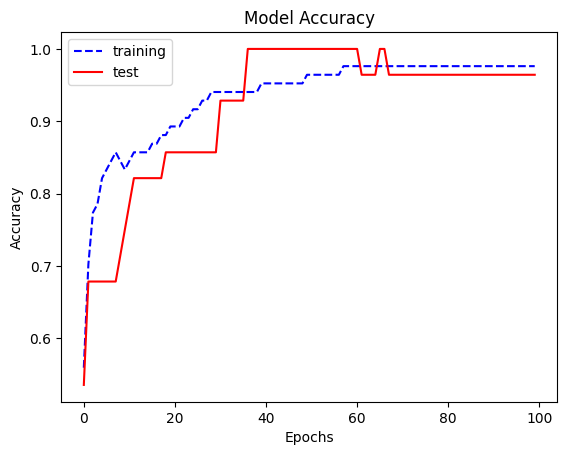

In [25]:
df_hist['accuracy'].plot(label='training', style='b--')
df_hist['val_accuracy'].plot(label='test', style='r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

How to prediction

In [26]:
X_new = [
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.7, 3.1, 4.4, 1.4],  # Versicolor
    [7.2, 3.6, 6.1, 2.5]   # Virginica
]

X_new_sc = sc.transform(X_new)
X_new_sc

d:\Programming_File\Environment\tf\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [ 1.03800476,  0.09821729,  0.36489628,  0.26414192],
       [ 1.64384411,  1.24920112,  1.33113254,  1.71209594]])

In [27]:
y_pred = model.predict(X_new_sc)
y_pred = np.argmax(y_pred, axis=1)
print(class_names[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
['setosa' 'versicolor' 'virginica']


ฺBoundary
เนื่องจาก output model เป็น one-hot จึงต้องทำ converted class

In [28]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        y_pred_cat = np.argmax(y_pred, axis=1)
        return y_pred_cat
    
model_no_ohe = Onehot2Int(model)

Boundary plot

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 608us/step


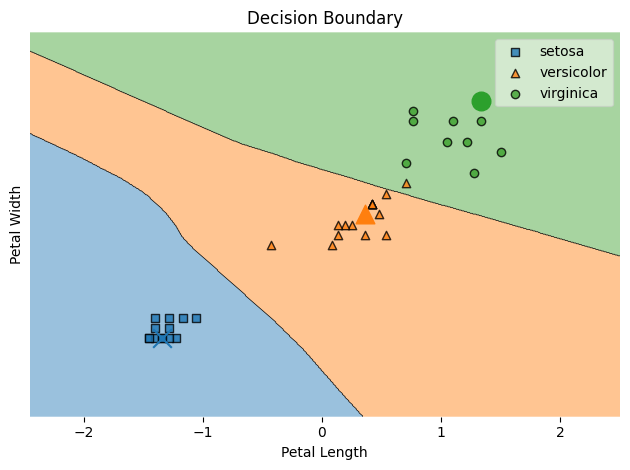

In [29]:
from mlxtend.plotting import plot_decision_regions
# Plot decision regions
value = 0
width = 5.5

# Create Decision Boundary
ax = plot_decision_regions(X_test, np.array(y_test), 
                           clf=model_no_ohe,
                           feature_index=[2, 3],
                           filler_feature_values={0: value, 1: value},
                           filler_feature_ranges={0: width, 1: width},
                           legend=2
                           )

handles, labels = ax.get_legend_handles_labels()
# Create custom legend
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Decision Boundary')
plt.yticks([])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# New plot Predict 0 1 2 is type of iris
plt.scatter(X_new_sc[:, 2][y_pred==0], X_new_sc[:, 3][y_pred==0], s=180, marker='x')
plt.scatter(X_new_sc[:, 2][y_pred==1], X_new_sc[:, 3][y_pred==1], s=180, marker='^')
plt.scatter(X_new_sc[:, 2][y_pred==2], X_new_sc[:, 3][y_pred==2], s=180, marker='o')
plt.tight_layout()
plt.show()

In [31]:
print(type(y_pred))
print(X_test)

<class 'numpy.ndarray'>
[[-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e+00]
 [-9.00681170e-01 -1.28296331e+00 -4.30827696e-01 -1.30754636e-01]
 [ 9.16836886e-01 -1.31979479e-01  3.64896281e-01  2.64141916e-01]
 [-5.37177559e-01  1.93979142e+00 -1.39706395e+00 -1.05217993e+00]
 [ 2.49201920e+00  1.70959465e+00  1.50164482e+00  1.05393502e+00]
 [ 5.53333275e-01  5.58610819e-01  5.35408562e-01  5.27406285e-01]
 [ 1.28034050e+00  9.82172869e-02  7.62758269e-01  1.44883158e+00]
 [-9.00681170e-01  1.70959465e+00 -1.05603939e+00 -1.05217993e+00]
 [-1.38535265e+00  3.28414053e-01 -1.22655167e+00 -1.31544430e+00]
 [ 1.28034050e+00  3.28414053e-01  1.10378283e+00  1.44883158e+00]
 [-2.94841818e-01 -8.22569778e-01  2.51221427e-01  1.32509732e-01]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [ 1.52267624e+00 -1.31979479e-01  1.21745768e+00  1.18556721e+00]
 [ 6.74501145e-01  3.28414053e-01  4.21733708e-01  3.95774101e-01]
 [ 1.89829664e-01 -3.62176246e-01  4.2